Categorical Prediction:
    If the Commit has a associated issue number: +ve Bucket
    else -ve Bucket    

ref : https://www.kaggle.com/philschmidt/initial-time-series-eda

In [210]:
from urllib.request import urlopen
import json
from pandas.io.json import json_normalize
import pandas as pd  # read and wrangle dataframes

import requests



#response = pd.read_json('https://api.github.com/repos/akkhil2012/MachineLearning/commits/57f90f49744a58969fae22a086ea31a77ec706e6')
#df = json.loads(requests.get('https://api.github.com/repos/akkhil2012/MachineLearning/commits').text)
#df = json.loads(requests.get('https://api.github.com/repos/akkhil2012/spark/commits').text)


# to get the issue asscoiated with commits: https://api.github.com/repos/akkhil2012/MachineLearning/issues/1/comments
#data = pd.DataFrame.from_dict(df, orient='columns')


data = pd.read_json("https://api.github.com/repos/akkhil2012/spark/commits")

#print(data.head())


#print(data.info())










In [211]:

type(data)
#data.author.sort_values()

pandas.core.frame.DataFrame

In [212]:
data.head()

,author,comments_url,commit,committer,html_url,parents,sha,url
0,"{'login': 'yanboliang', 'id': 1962026, 'avatar...",https://api.github.com/repos/akkhil2012/spark/...,"{'author': {'name': 'Yanbo Liang', 'email': 'y...","{'login': 'yanboliang', 'id': 1962026, 'avatar...",https://github.com/akkhil2012/spark/commit/528...,[{'sha': '3c2fc19d478256f8dc0ae7219fdd18803021...,528c9281aecc49e9bff204dd303962c705c6f237,https://api.github.com/repos/akkhil2012/spark/...
1,"{'login': 'jiangxb1987', 'id': 4784782, 'avata...",https://api.github.com/repos/akkhil2012/spark/...,"{'author': {'name': 'Xingbo Jiang', 'email': '...","{'login': 'cloud-fan', 'id': 3182036, 'avatar_...",https://github.com/akkhil2012/spark/commit/3c2...,[{'sha': '49d767d838691fc7d964be2c4349662f5500...,3c2fc19d478256f8dc0ae7219fdd188030218c07,https://api.github.com/repos/akkhil2012/spark/...
2,"{'login': 'actuaryzhang', 'id': 11082368, 'ava...",https://api.github.com/repos/akkhil2012/spark/...,"{'author': {'name': 'actuaryzhang', 'email': '...","{'login': 'yanboliang', 'id': 1962026, 'avatar...",https://github.com/akkhil2012/spark/commit/49d...,[{'sha': '52981715bb8d653a1141f55b36da804412eb...,49d767d838691fc7d964be2c4349662f5500ff2b,https://api.github.com/repos/akkhil2012/spark/...
3,"{'login': 'actuaryzhang', 'id': 11082368, 'ava...",https://api.github.com/repos/akkhil2012/spark/...,"{'author': {'name': 'actuaryzhang', 'email': '...",None,https://github.com/akkhil2012/spark/commit/529...,[{'sha': 'fddb63f46345be36c40d9a7f3660920af650...,52981715bb8d653a1141f55b36da804412eb783a,https://api.github.com/repos/akkhil2012/spark/...
4,"{'login': 'actuaryzhang', 'id': 11082368, 'ava...",https://api.github.com/repos/akkhil2012/spark/...,"{'author': {'name': 'actuaryzhang', 'email': '...",None,https://github.com/akkhil2012/spark/commit/fdd...,[{'sha': 'e2f32ee45ac907f1f53fde7e412676a849a9...,fddb63f46345be36c40d9a7f3660920af6502bbd,https://api.github.com/repos/akkhil2012/spark/...


In [227]:

features = data.columns[:-1].tolist()
#authors =le.transform(data['author']) 
print(type(data[features]))
#print(features)
#print(type(features['sha']))

'''
corr = data[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr,cmap= 'coolwarm')
plt.show()
'''




<class 'pandas.core.frame.DataFrame'>


TypeError: list indices must be integers or slices, not str

Taking author name and Date as input and the target variable

In [214]:
import numpy as np
#print(data['commit'][0]['author'])

#print(data['commit'][0]['author'])
from sklearn import preprocessing

le = preprocessing.LabelEncoder()


lst = []
targetList= []

for i in range(0,len(data['commit'])):
    lst.append(data['commit'][i]['author']['name'])
    targetList.append(data['commit'][i]['author']['date'])

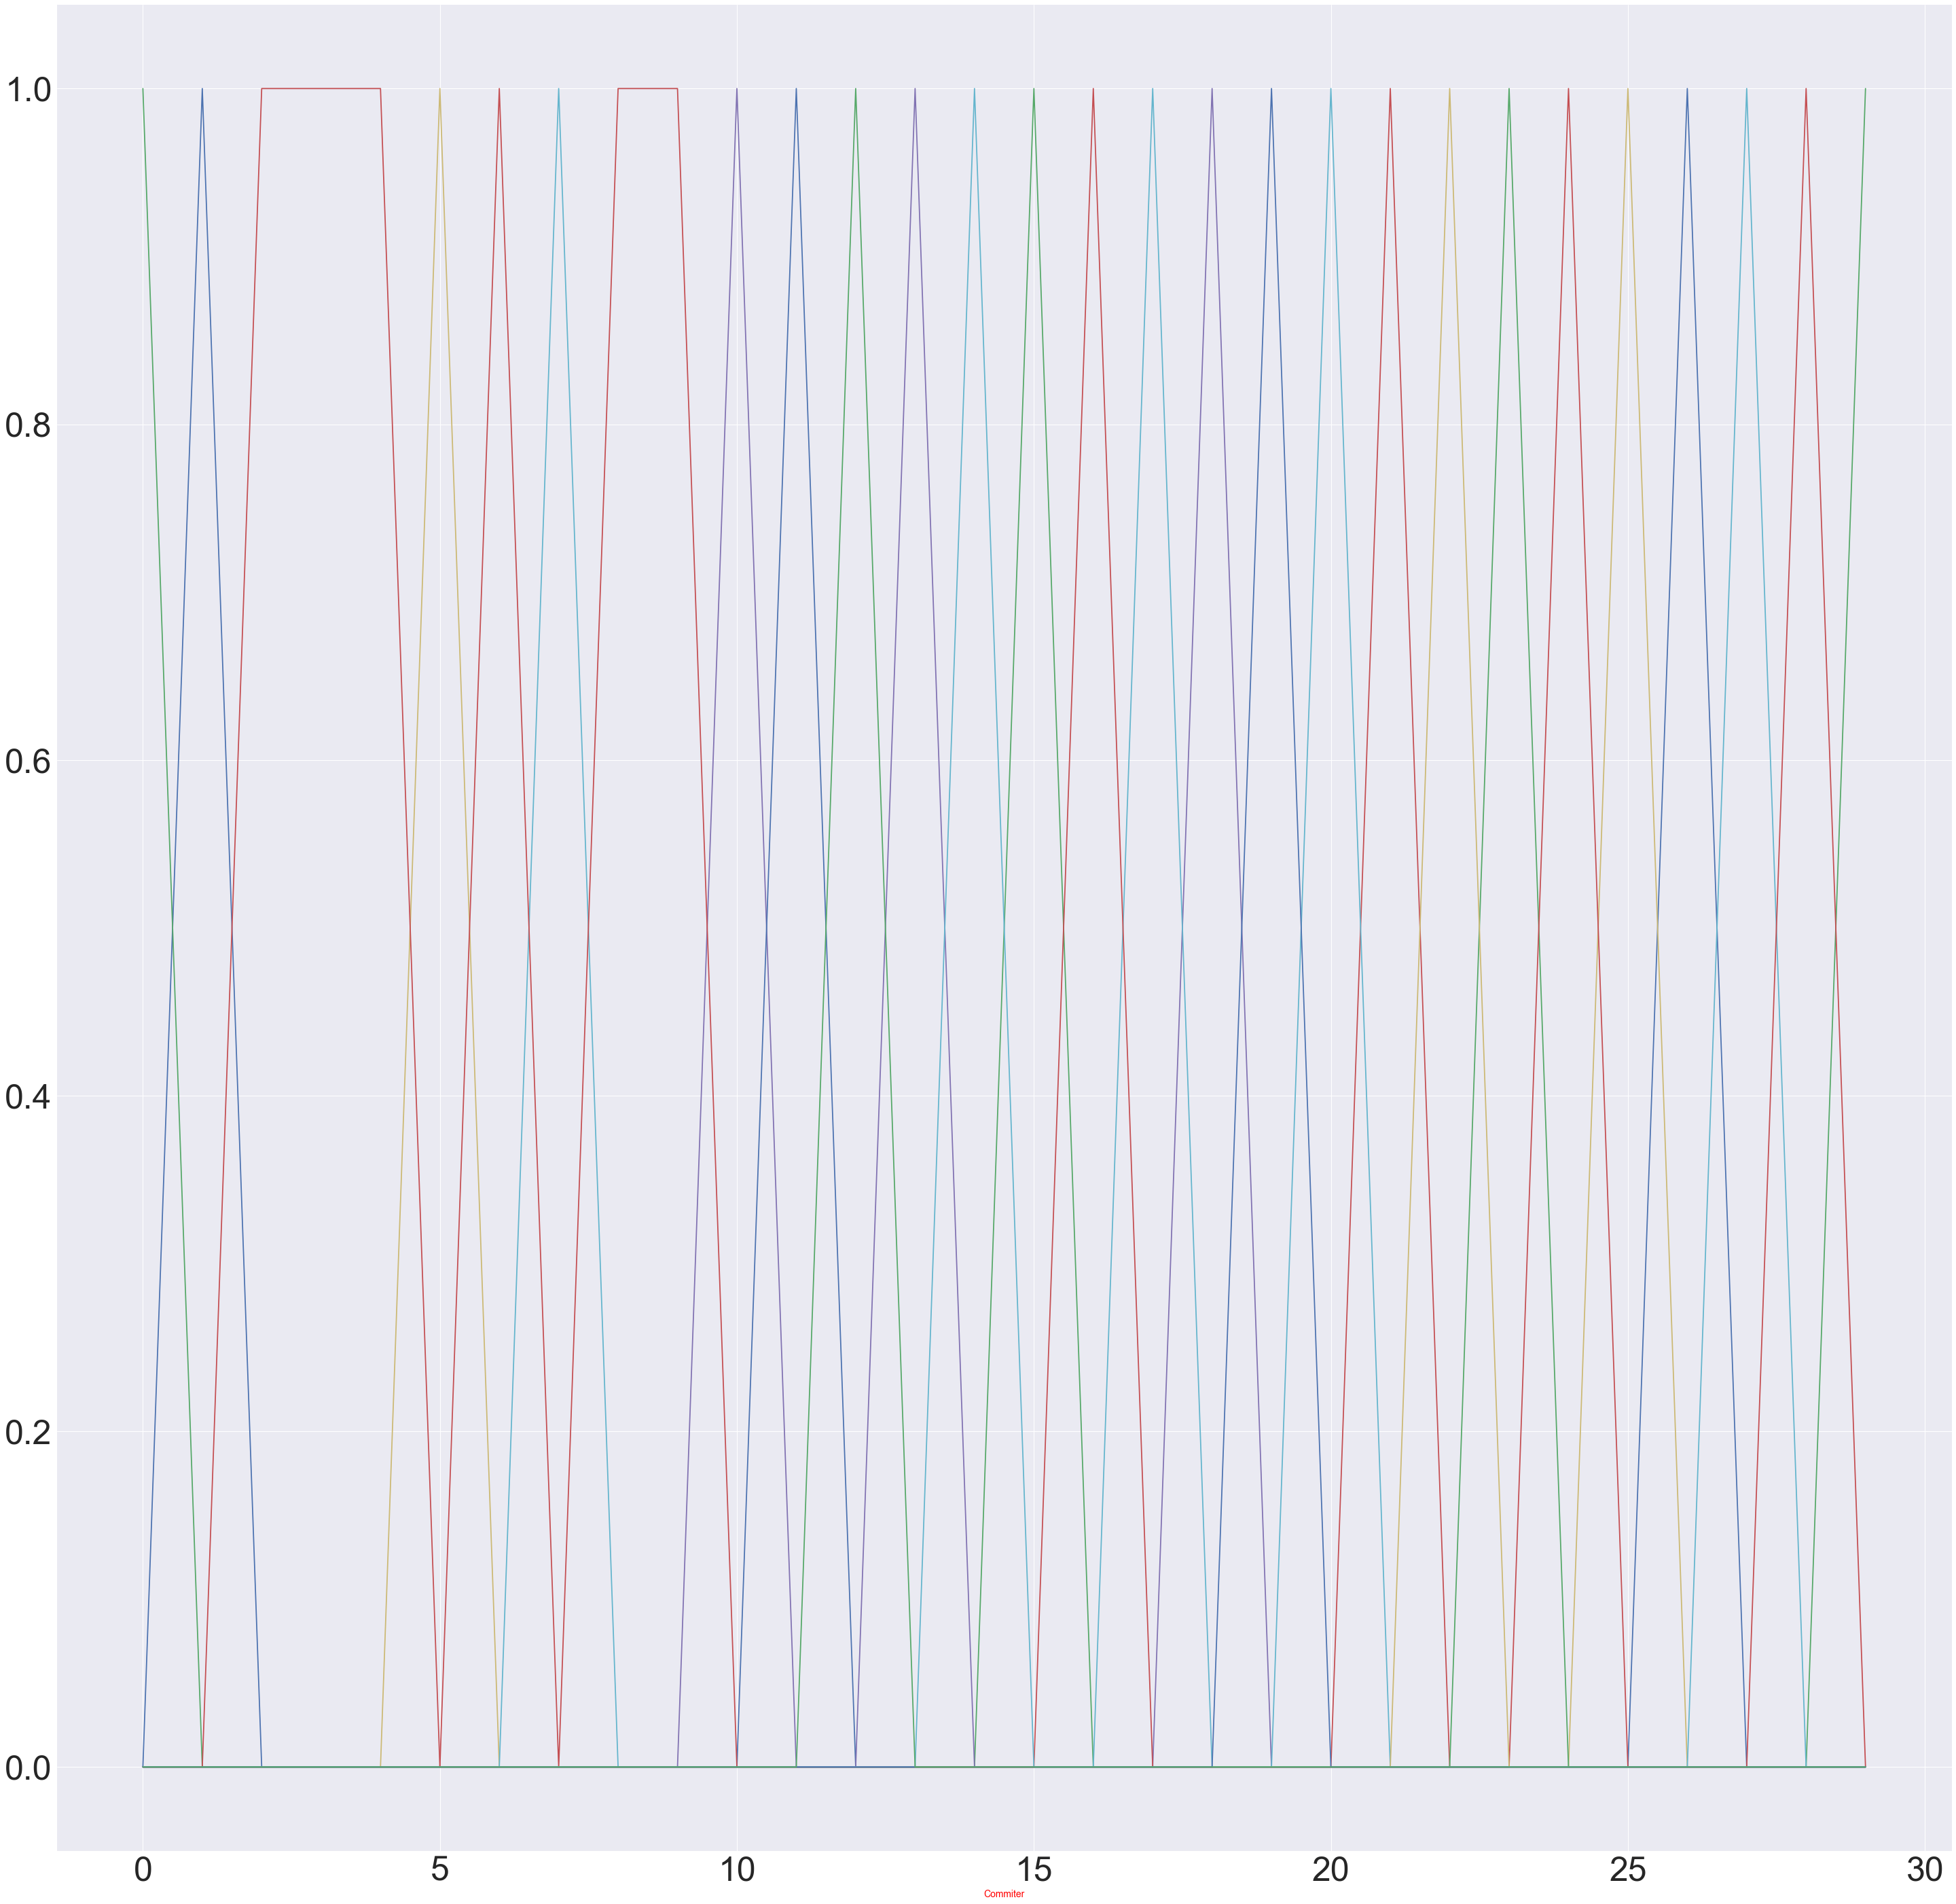

'\nfeatures = float(data_name.columns[:-1]).tolist()\n\nprint(" type of features -------" , type(features))\n\nfor feat in features:\n    skew = data[feat].skew()\n    sns.distplot(data[feat], kde= False,color=\'red\', label=\'Skew = %.3f\' %(skew), bins=30)\n    plt.legend(loc=\'best\')\n    plt.show()\n'

In [215]:
import numpy as np
import seaborn as sns # statistical visualizations and aesthetics
import matplotlib.pyplot as plt

#print("--1----->" , type(targetList))
data_date = pd.get_dummies(targetList, columns=["date"])

data_name = pd.get_dummies(lst, columns=["name"])

plt.plot(data_name)
plt.xlabel('Commiter',fontsize=14, color='red')
plt.show()

'''
features = float(data_name.columns[:-1]).tolist()

print(" type of features -------" , type(features))

for feat in features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False,color='red', label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()
'''


In [216]:
data_name

,Burak Yavuz,Eric Vandenberg,Felix Cheung,Feng Liu,Herman van Hovell,IngoSchuster,Liang-Chi Hsieh,Nick Pentreath,Shixiong Zhu,Sital Kedia,Wang Gengliang,Wenchen Fan,Xingbo Jiang,Yanbo Liang,actuaryzhang,fjh100456,hyukjinkwon,jinxing,wangzhenhua,杨治国10192065
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [217]:
type(data_date)



    
    


targetList = data_date.columns[:-1].tolist()
print(type(targetList))

le.fit(targetList)
date_features =le.transform(targetList) 
print(type(date_features))

type(data_name)
input_List = data_name.columns[:-1].tolist()
print(type(input_List))

for i in range(0,10):
    input_List.append(i)


le.fit(input_List)
name_features =le.transform(input_List) 
print(type(name_features))




<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
len(input_List)

In [ ]:
len(targetList)

In [ ]:
name_features



How to overcome the same legth of array contraint in plot: here size 29?????????????????????????????????

In [ ]:
name_features.size


In [ ]:
date_features.size

In [ ]:
name_features

In [ ]:
date_features

In [ ]:
matplotlib.pyplot.scatter(name_features,date_features,s=1000)

matplotlib.pyplot.show()

In [ ]:
'''
from pylab import *

matplotlib.rcParams['figure.figsize'] = (50.0, 50.0)

#plt.plot(input_List,targetList)
#plot(name_features, date_features)############### This will plot a line plot



matplotlib.pyplot.scatter(name_features,date_features,s=1000)

matplotlib.pyplot.show()

 
xlabel('Committer ',fontsize=60)
ylabel('Commit Date',fontsize=60)
title('Committer TO Commit date Plot')
grid(True)
show()


from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(input_List)
tranformArray = le.transform(input_List) 
print(tranformArray)
print("-----------------")
revtranformArray = le.inverse_transform(tranformArray)
print(revtranformArray)

print("-----=====================================================================---------------------")
le.fit(targetList)
tranformArrayDate = le.transform(targetList) 
print(tranformArray)
print("-----------------")
tranformArrayDate = le.inverse_transform(tranformArrayDate)
print(tranformArrayDate)

'''


In [ ]:
import matplotlib.pyplot as plt

import time

print(type(lst))
print(type(targetList))

matplotlib.rc('xtick', labelsize=50)
matplotlib.rc('ytick', labelsize=50)

#names = lst
#commit_date=targetList

names=name_features
commit_date=date_features

x = range(len(names))
y = range(len(names))

#plt.plot(x, y)
plt.scatter(name_features,date_features,s=1000)

xlabel('Committer ',fontsize=5)
ylabel('Commit Date',fontsize=5)

plt.xticks(x, names,rotation='vertical')
plt.yticks(y, commit_date)



#matplotlib.pyplot.show()

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EAE13C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F63B940>]], dtype=object)

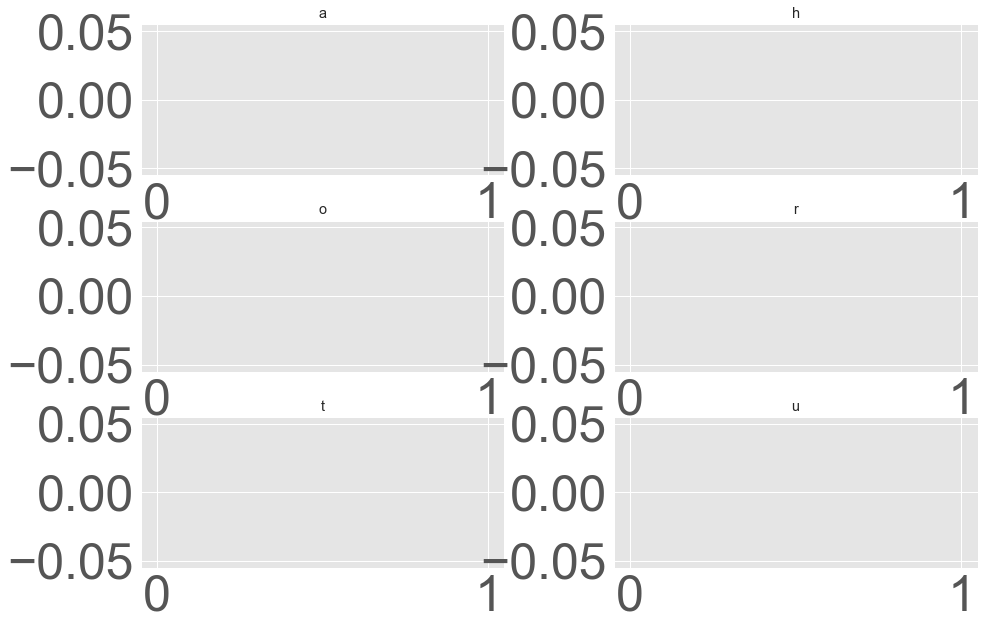

In [255]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

sns.set_style('whitegrid')

matplotlib.style.use('ggplot')

#df = pd.DataFrame(np.random.randint(0,10,(20,6)),columns=list('author'))
df = pd.DataFrame(data,columns=list('author'))

#features['author']

df.hist(alpha=0.5, figsize=(15, 10))

In [245]:
'''
import seaborn as sns # statistical visualizations and aesthetics
print(type(features['author']))
#features = lst
print(features)

for feat in features:
    skew = int(features[feat]).skew()  
    sns.distplot(features[feat], kde= False,color='red', label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()
    
'''    

TypeError: list indices must be integers or slices, not str

In [ ]:
import matplotlib.pyplot as plt

import time

print(type(lst))
print(type(targetList))

matplotlib.rc('xtick', labelsize=50)
matplotlib.rc('ytick', labelsize=50)

names = lst
commit_date=targetList

#names=name_features
#commit_date=date_features

x = range(len(names))
y = range(len(names))

#plt.plot(x, y)
plt.scatter(name_features,date_features,s=1000)

xlabel('Committer ',fontsize=5)
ylabel('Commit Date',fontsize=5)

plt.xticks(x, names,rotation='vertical')
plt.yticks(y, commit_date)



#matplotlib.pyplot.show()

plt.show()

========================Scattered : Modified with name_features and date_features==============================

In [ ]:
#data_name

In [ ]:
seed = 7
test_size = 0.2
from sklearn.model_selection import train_test_split
X = input_List
y = targetList
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

In [ ]:
#x1 = np.linspace(0, 1, 29)
#x2 = np.linspace(0, 1, 100)
'''
plt.plot(X)
plt.plot(y)
plt.show()
'''

In [ ]:
data_date = pd.get_dummies(targetList, columns=["date"])



plt.plot(data_date)
plt.xlabel('Commit_Date',fontsize=24, color='red')
plt.show()

In [ ]:
np.polyfit(name_features,date_features,1)

In [ ]:
#data_name.astype("category").cat.codes
pd.get_dummies(lst, columns=["name"])

In [ ]:
pd.get_dummies(targetList, columns=["date"])

In [ ]:
data.info()

In [ ]:
print(data['commit'].dtypes)

temp = data['commit']

for item in data["commit"]:
    print (item["message"])        
        
     

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()

print(len(name_features))
print(len(date_features))

clf = clf.fit(name_features.reshape(-1, 1), date_features.reshape(-1, 1))



In [ ]:
print(data['author'].dtypes)

#data = pd.get_dummies(data,dummy_na='True')

temp = data['author']

print(type(temp))

#for item in data["author"]:
    #print (item["id"])        
        
#data.sha.hist(xlabelsize=20 ,ylabelsize=20)     

In [ ]:
clf.predict(float(X_test))